In [38]:
#Import Dependencies
import pandas as pd
import requests
import time
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
from scipy.stats import linregress

#Create Output File (CSV)
output_data_file = "output_data/cities.csv"

In [39]:
#Use CityPy to generate list of cities for weather data

from citipy import citipy


#Set latitude and longitude ranges 

latitide_range = (-90, 90)
longitude_range = (-180, 180)


#Set empty lists to hold city and coordinates
coordinates = []
cities = []

#Set random latitude and longitude coordinates
lats = np.random.uniform(latitide_range[0], latitide_range[1], size=1500)
lngs = np.random.uniform(longitude_range[0], longitude_range[1], size=1500)
coordinates = zip(lats, lngs)


#Use loop to select closest city to random coordinates
for coordinates in coordinates:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
    
    #Add city to city list if unique
    if city not in cities:
        cities.append(city)
        
len(cities)

611

In [40]:
#Set URL config

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

#Create partial URL with API key

query_url = f'{url}appid={api_key}&units={units}&q='


In [41]:
#Create empty lists for necessary data
city_name = []
latitude = []
longitude= []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

record = 1

#Create for loop to append above lists with weather data
for city in cities:
    try:
        response = requests.get(query_url + city).json() 
        city_name.append(response['name'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        print(f'Processing Record {record} | {city}')
        
        record = record + 1
        
        time.sleep(1.00)
    
    except Exception:
        print("City not found. Skipping...")
    continue

Processing Record 1 | atuona
Processing Record 2 | hermanus
City not found. Skipping...
Processing Record 3 | ushuaia
Processing Record 4 | srandakan
Processing Record 5 | qaanaaq
Processing Record 6 | la seyne-sur-mer
Processing Record 7 | vostok
Processing Record 8 | aripuana
Processing Record 9 | dikson
Processing Record 10 | chokurdakh
Processing Record 11 | vaini
Processing Record 12 | coos bay
Processing Record 13 | belaya gora
Processing Record 14 | mataura
Processing Record 15 | rikitea
Processing Record 16 | butaritari
Processing Record 17 | itarema
Processing Record 18 | busselton
Processing Record 19 | castro
Processing Record 20 | saint george
Processing Record 21 | bredasdorp
Processing Record 22 | victoria
Processing Record 23 | barrow
City not found. Skipping...
Processing Record 24 | jamestown
Processing Record 25 | provideniya
Processing Record 26 | huntington
City not found. Skipping...
Processing Record 27 | dukat
Processing Record 28 | yulara
Processing Record 29 | 

Processing Record 229 | cabo san lucas
Processing Record 230 | schwarzenbek
Processing Record 231 | tasiilaq
Processing Record 232 | tilichiki
Processing Record 233 | caravelas
Processing Record 234 | varkaus
Processing Record 235 | sabla
Processing Record 236 | maningrida
Processing Record 237 | dillon
Processing Record 238 | sao joao da barra
Processing Record 239 | ballina
Processing Record 240 | sakakah
Processing Record 241 | simplicio mendes
Processing Record 242 | ixtapa
Processing Record 243 | havre-saint-pierre
Processing Record 244 | zhumadian
City not found. Skipping...
Processing Record 245 | catamarca
Processing Record 246 | port hedland
Processing Record 247 | xingcheng
Processing Record 248 | anadyr
Processing Record 249 | launceston
Processing Record 250 | tiznit
City not found. Skipping...
Processing Record 251 | suez
Processing Record 252 | ahipara
Processing Record 253 | xining
Processing Record 254 | juegang
Processing Record 255 | samarai
Processing Record 256 | bj

Processing Record 464 | san cristobal
Processing Record 465 | terrytown
Processing Record 466 | portland
Processing Record 467 | qaqortoq
Processing Record 468 | dubbo
Processing Record 469 | nalut
Processing Record 470 | netrakona
Processing Record 471 | richards bay
Processing Record 472 | entre rios
Processing Record 473 | trincomalee
City not found. Skipping...
Processing Record 474 | cozumel
Processing Record 475 | vulcan
Processing Record 476 | alexandria
Processing Record 477 | banjar
Processing Record 478 | whyalla
Processing Record 479 | sharjah
Processing Record 480 | san vicente de canete
Processing Record 481 | hambantota
Processing Record 482 | tarakan
Processing Record 483 | altamira
Processing Record 484 | ngunguru
Processing Record 485 | sobolevo
Processing Record 486 | derzhavinsk
Processing Record 487 | vao
Processing Record 488 | jiangyou
Processing Record 489 | lima
Processing Record 490 | kiomboi
Processing Record 491 | dmitriyevka
Processing Record 492 | mindelhei

In [43]:
#Create dictionary for weather DF

weather_dict={
    'City': city_name,
    'Latitude': latitude,
    'Longitude': longitude,
    'Temperature (F)': temperature,
    'Humidity (%)': humidity,
    'Cloudiness (%)': cloudiness,
    'Wind Speed (mph)': wind_speed}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()
weather_df.to_csv(output_data_file, index=False, header=True)

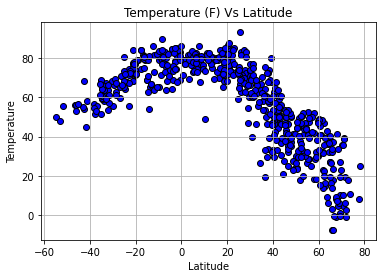

In [44]:
#Create Scatterplot for Temperature (F) Vs Latitude

plt.scatter(weather_df['Latitude'], weather_df['Temperature (F)'], marker='o', facecolors="blue", edgecolors="black" )
plt.title('Temperature (F) Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(True)
plt.savefig("Output_Data/TempVsLatitude.png")

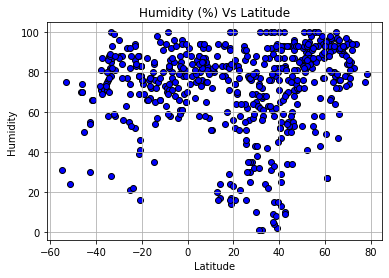

In [45]:
#Create Scatterplot for Humidity (%) vs. Latitude

plt.scatter(weather_df['Latitude'], weather_df['Humidity (%)'], marker='o', facecolors="blue", edgecolors="black" )
plt.title('Humidity (%) Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)
plt.savefig("Output_Data/HumidityVsLatitude.png")

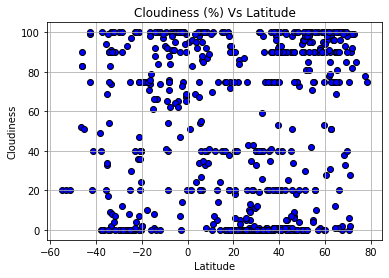

In [46]:
#Create Scatterplot for Cloudiness (%) vs. Latitude

plt.scatter(weather_df['Latitude'], weather_df['Cloudiness (%)'], marker='o', facecolors="blue", edgecolors="black" )
plt.title('Cloudiness (%) Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
plt.savefig("Output_Data/CloudinessVsLatitude.png")

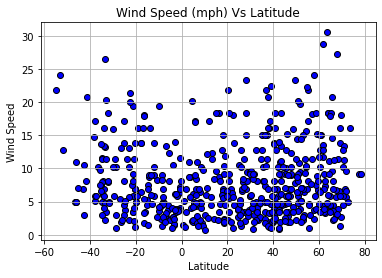

In [47]:
#Create Scatterplot for Wind Speed (mph) vs. Latitude

plt.scatter(weather_df['Latitude'], weather_df['Wind Speed (mph)'], marker='o', facecolors="blue", edgecolors="black" )
plt.title('Wind Speed (mph) Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.savefig("Output_Data/WindSpeedVsLatitude.png")

In [48]:
#Create separate DF for Northern Hemisphere

northern_df = weather_df.loc[weather_df['Latitude'] > 0]
northern_df.head()

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
4,Qaanaaq,77.48,-69.36,8.02,75,78,9.15
5,La Seyne-sur-Mer,43.10,5.88,53.85,69,0,11.01
6,Vostok,46.49,135.88,32.22,96,7,2.82
8,Dikson,73.51,80.55,10.76,94,85,16.11
9,Chokurdakh,70.63,147.92,4.57,95,99,10.27


In [49]:
#Create separate DF for Southern Hemisphere
southern_df = weather_df.loc[weather_df['Latitude'] < 0]
southern_df.head()

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Atuona,-9.80,-139.03,79.02,73,93,19.44
1,Hermanus,-34.42,19.23,64.00,86,54,5.99
2,Ushuaia,-54.80,-68.30,50.00,31,20,21.92
3,Srandakan,-7.94,110.25,77.18,86,84,4.88
7,Aripuanã,-9.17,-60.63,80.58,70,92,4.38


The r-value is: -0.8691170944055513


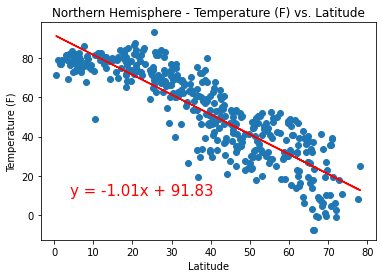

<Figure size 432x288 with 0 Axes>

In [75]:
#Create Linear Regression for Northern Hemisphere - Temperature (F) vs. Latitude

x_values = northern_df['Latitude']
y_values = northern_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Output_Data/NorthTempVsLat.png")

The r-value is: 0.7728089196093227


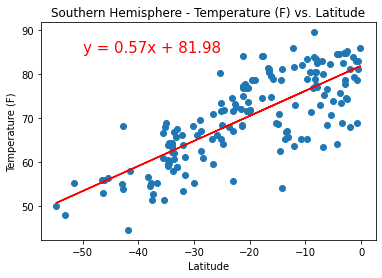

<Figure size 432x288 with 0 Axes>

In [76]:
#Create Linear Regression for Southern Hemisphere - Temperature (F) vs. Latitude

x_values = southern_df['Latitude']
y_values = southern_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Output_Data/SouthTempVsLat.png")

The r-value is: 0.21827803071576685


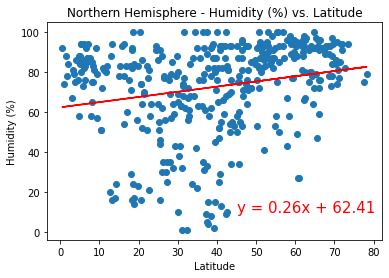

<Figure size 432x288 with 0 Axes>

In [79]:
#Create Linear Regression for Northern Hemisphere - Humidity (%) vs. Latitude

x_values = northern_df['Latitude']
y_values = northern_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Output_Data/NorthHumidityVsLat.png")

The r-value is: 0.17518299332878545


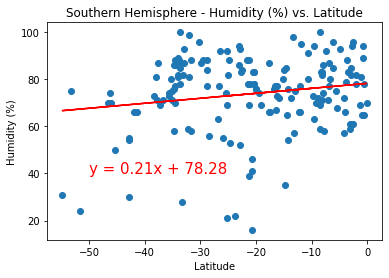

<Figure size 432x288 with 0 Axes>

In [80]:
#Create Linear Regression for Southern Hemisphere - Humidity (%) vs. Latitude

x_values = southern_df['Latitude']
y_values = southern_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Output_Data/SouthHumidityVsLat.png")

The r-value is: 0.21569229893824785


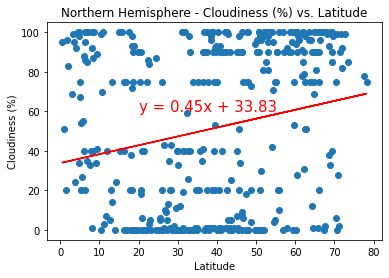

In [67]:
#Create Linear Regression for Northern Hemisphere - Cloudiness (%) vs. Latitude

x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, 60),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Output_Data/NorthHumidityVsLat.png")

The r-value is: 0.2764502890511345


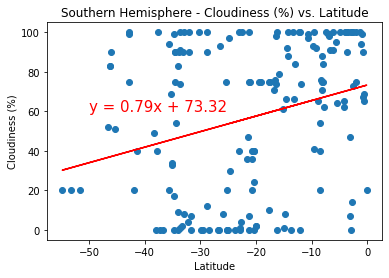

In [69]:
#Create Linear Regression for Southern Hemisphere - Cloudiness (%) vs. Latitude

x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.17805399360852123


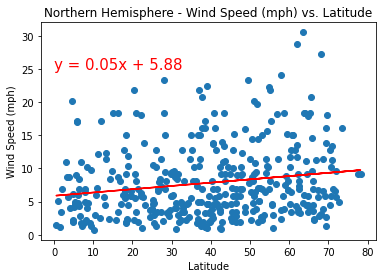

In [72]:
#Create Linear Regression for Northern Hemisphere - Wind Speed (mph) vs. Latitude

x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 25),fontsize=15,color="red")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.32108031859280417


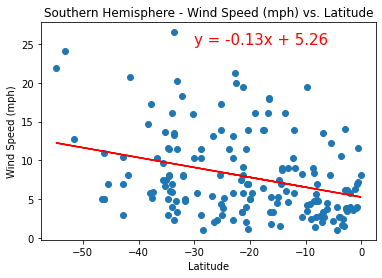

In [74]:
#Create Linear Regression for Southern Hemisphere - Wind Speed (mph) vs. Latitude

x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.show()